<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта---Постановка-задач" data-toc-modified-id="Описание-проекта---Постановка-задач-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта - Постановка задач</a></span></li><li><span><a href="#Получение-данных" data-toc-modified-id="Получение-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Получение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Проведение-исследовательского-анализа-данных-(EDA),-Выделение-портрета-клиентов,-которые-склонны-уходить-из-банка" data-toc-modified-id="Проведение-исследовательского-анализа-данных-(EDA),-Выделение-портрета-клиентов,-которые-склонны-уходить-из-банка-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведение исследовательского анализа данных (EDA), Выделение портрета клиентов, которые склонны уходить из банка</a></span></li><li><span><a href="#Сформулируем-и-проверим-статистические-гипотезы" data-toc-modified-id="Сформулируем-и-проверим-статистические-гипотезы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Сформулируем и проверим статистические гипотезы</a></span></li><li><span><a href="#ВЫВОДЫ-и-Рекомендации" data-toc-modified-id="ВЫВОДЫ-и-Рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ВЫВОДЫ и Рекомендации</a></span></li></ul></div>

___

## Описание проекта - Постановка задач

__Анализ проводится для  Продуктового Аналитика банка «Метанпромбанк»__


__Задачи и цели:__ 

- Исследование клиентов банка для дальнейшего продвижения продуктов банка. 
- Составление характерного портрета клиентов, которые склонны уходить из банка.
- Подготовка рекомендаций  в целях сокращения отток  текущих  клиентов.
- Формулирование и проверка статистических гипотез
    -  гипотезу различия дохода между теми клиентами, которые ушли и кто остался в банке
    -  гипотеза о равенстве скоринга клиентов которые остались и кто ушел из банка
    
- Подготовка презентации для Продуктового Аналитика банка «Метанпромбанк» по итогам анализа
    

 __Описание полученных данных:__

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга клиента,
- `City` — город в котором находится банк,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности у клиента,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — показатель активности клиента 1- активный, 0-не активный (данные за прошлый период).
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет (данные за прошлый период).


___

## Получение данных 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy import stats as st
import plotly.express as px
from plotly import graph_objects as go


In [2]:
# df = pd.read_csv(r'C:\Users\bank_dataset.csv', sep = ',')

try:
    df = pd.read_csv(r"C:\Users\bank_dataset.csv",sep = ',')
except:
    df = pd.read_csv('/datasets/bank_dataset.csv',sep = ',')

In [3]:
df.head()

userid  score       City Gender  Age  Objects    Balance  Products  \
0  15677338    619  Ярославль      Ж   42        2        NaN         1   
1  15690047    608    Рыбинск      Ж   41        1   83807.86         1   
2  15662040    502  Ярославль      Ж   42        8  159660.80         3   
3  15744090    699  Ярославль      Ж   39        1        NaN         2   
4  15780624    850    Рыбинск      Ж   43        2  125510.82         1   

   CreditCard  Loyalty  estimated_salary  Churn  
0           1        1         101348.88      1  
1           0        1         112542.58      0  
2           1        0         113931.57      1  
3           0        0          93826.63      0  
4           1        1          79084.10      0

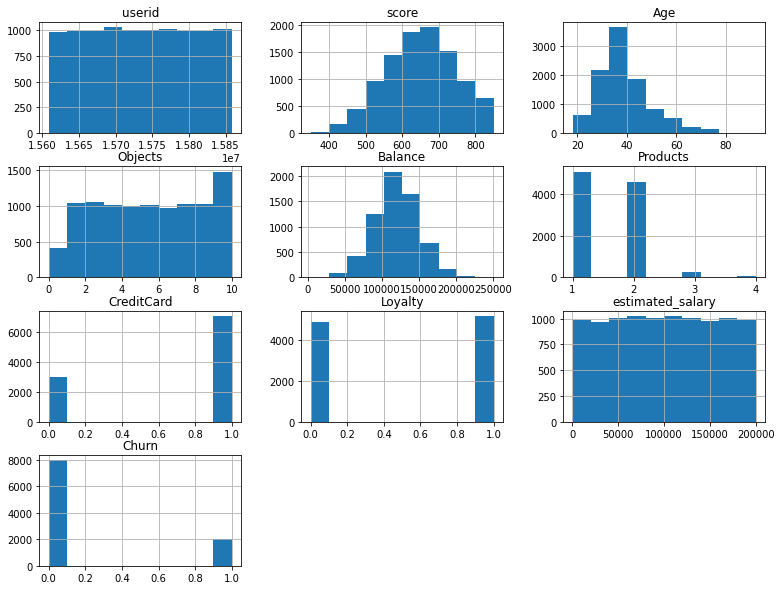

In [4]:
df.hist(figsize=(13, 10));

In [5]:
#Функция помогает сразу вывести  информацию о ДФ
def showtime(df):
    display("Выведем первые строки  Данных")
    display(df.head())
    display('-'*10)
    display("Выведем информацию по  имеющимся в файле Данным")
    display(df.info())
    display('-'*10)
    display("Есть ли пропуски в  Данных и их количество")
    display(df.isna().sum())
    display('-'*10)
    display("Какое количество полных дубликатов в  Данных")
    display(df.duplicated().sum())
    
showtime(df) 

'Выведем первые строки  Данных'

userid  score       City Gender  Age  Objects    Balance  Products  \
0  15677338    619  Ярославль      Ж   42        2        NaN         1   
1  15690047    608    Рыбинск      Ж   41        1   83807.86         1   
2  15662040    502  Ярославль      Ж   42        8  159660.80         3   
3  15744090    699  Ярославль      Ж   39        1        NaN         2   
4  15780624    850    Рыбинск      Ж   43        2  125510.82         1   

   CreditCard  Loyalty  estimated_salary  Churn  
0           1        1         101348.88      1  
1           0        1         112542.58      0  
2           1        0         113931.57      1  
3           0        0          93826.63      0  
4           1        1          79084.10      0

'----------'

'Выведем информацию по  имеющимся в файле Данным'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


None

'----------'

'Есть ли пропуски в  Данных и их количество'

userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64

'----------'

'Какое количество полных дубликатов в  Данных'

0

Напомним что содержится в колонках:
    
- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта 0 - нет,1 - есть карта
- `Loyalty` — активный клиент,0 - нет,1 - активный
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет, 0 - нет, 1 - да.


In [6]:
a = df[['Balance']].isna().sum()/ len(df)  * 100
a 
# (п.с. расчет можно было не проводить, у нас  очень круглая  цифра 10 тыс - общее кол-во записей)

Balance    36.17
dtype: float64

В предоставленных данных 10 тыс. записей. Из них полных дубликатов - 0. 

Колонки в датафрейме имеют следующие виды данных: числовой (int, float)  и строковый (object). 

Типы колонок не надо переводить в другие. 

Есть пропущенные данные в колонке "Balance" 3617 записей (36,17 % ). 

___

## Предобработка данных


__Переименуем колонки__

In [7]:
df.columns =  map(str.capitalize, df.columns)
df=df.rename(columns = {'Userid':'User_id','Creditcard':'Credit_card','Estimated_salary':'Estimated_salary'})


__Посмотрим на неявные дубликаты по колонкам:__

In [8]:
#неявные дубликаты по колонкам
sum(df.duplicated(subset=['User_id', 'Balance']))

0

In [9]:
#неявные дубликаты по колонкам
sum(df.duplicated(subset=['User_id', 'City']))

0

In [10]:
#несмотря на то что  в info мы получили 10000 записей, хочу узнать -может часть клиентов записана несколько раз или есть
# несколько счетов на одно имя.
print(f'Количество уникальних клиентов:  {df.User_id.nunique()} чел.')

Количество уникальних клиентов:  10000 чел.


не обнаружили дубликаты по связям: пользователь - баланс и пользователи-город -  все записи по  идентификационному номеру клиентов - уникальные.

__Исследуем на вероятные ошибки / аномалии в данных - посмотрим уникальные значения в данных__

In [11]:
print(f'Уникальные данные в некоторых колонках:"City": {set(df.City)} | "Gender": {set(df.Gender)} |\
"Products": {set(df.Products)} | "Age": {set(df.Age)} | "Objects": {set(df.Objects)}' )

Уникальные данные в некоторых колонках:"City": {'Ярославль', 'Рыбинск', 'Ростов Великий'} | "Gender": {'Ж', 'М'} |"Products": {1, 2, 3, 4} | "Age": {18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 92} | "Objects": {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


In [12]:
df.City.value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: City, dtype: int64

Обнаружили что  в данных одному уникальному пользователю принадлежит одна запись, нет  записей о нескольких счетах на  единое лицо. Один пользователь - один баланс.

Названия городов соответствуют входным данным - нет иных  вариантов в записях, в Гендере всего 2  пола (также иных написаний нет), клиенты пользуются  от 1 до 4  видов продуктов банков, также аномалий в записях не замечено в Возрасте клиентов  а также в кол-ве принадлежащем клиентам объектов в собственности (движимое и недвижимое имущество). 

Всего 3 филиала в городах: 'Рыбинск' - 2477 клиента, 'Ростов Великий' - 2509 кл., 'Ярославль' - 5014 кл.


__Посмотрим на  пропущенные данные в колонке  _Balance___

In [13]:
df_no_balance = df[df['Balance'].isna()]
b= df_no_balance.groupby('City')['City'].count()
b

City
Рыбинск      1199
Ярославль    2418
Name: City, dtype: int64

Клиенты имеющие статус NaN в балансе   живут в  Рыбинске и Ярославле. В Ярославле  больше - это не областной город как Рыбинск. 

__Если отсутствующие значения по балансу заполним на 0 или средними / медианными значениями, то в дальнейшем  наши искуственные манипуляции смогут сильно повлиять  на выводы. Оставим как есть, без изменений.__

Объяснение - Халтура в работе.  Нет ответственного за работу с клиентами, полноту данных. Возможно  в отделениях Нет той же Службы менеджмента качества. Либо, в некоторых случаях отсутствие продукта.

__Создадим новые колонки с разбивкой на категории: относительно Balance__

In [14]:
# на основе колонки Balance создадим другую колонку  - есть ли 0 на счете или нет (категории 0 / 1)

df['Balance_cut'] =  df['Balance'].apply ( lambda x: 1 if x >= 0 else 0 )


# на основе колонки City создадим  колонки по наличию городов  -  (категории 0 / 1)

df['City_r'] =  df['City'].apply ( lambda x: 1 if x == 'Рыбинск' else 0 )
df['City_y'] =  df['City'].apply ( lambda x: 1 if x == 'Ярославль' else 0  )
df['City_g'] =  df['City'].apply ( lambda x: 1 if x == 'Ростов Великий' else 0 )


# на основе колонки Gender создадим  колонки по наличию пола  -  (категории 0 - Ж / 1 -М)
df['Sex'] =  df['Gender'].apply ( lambda x: 1 if x == 'М' else 0 )



# Нашла еще вариант с dummies, меньше писать, но  тип данных -  uint8 (не стала рисковать т.к. с таким типом данных не работала)
# метод,  генерируется новая тройка колонок. Эксперименты оставлю на потом!

# dummies = pd.get_dummies(df['City'], columns=['City'])

# df = pd.concat([df, dummies], axis=1)   # объединим исходный датафрейм и полученные колонки
# df=df.rename(columns = {'Ростов Великий':'City_g', 'Рыбинск':'City_r', 'Ярославль':'City_y'}) #Переименуем колонки

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_id           10000 non-null  int64  
 1   Score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   Credit_card       10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  Estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
 12  Balance_cut       10000 non-null  int64  
 13  City_r            10000 non-null  int64  
 14  City_y            10000 non-null  int64  
 15  City_g            10000 non-null  int64  
 16  Sex               10000 non-null  int64  

__Выводы по этапу Предобработка:__

Часть колонок переименовали. Не были найдены неявные дубли по связкам колонок, ошибки в заполнении данных не найдены, показатели выглядят корректно без внешний проявлений аномалий.  Для  последующего анализа  мы рассмотрели данные которые в Балансе имеют пропущенные значения и нашли  что такие данные характерны для клиентов из Рыбинска и Ярославля. Было принято решение не заполнить  отсутствующие данные в колонке Balance  на  другие показатели. Нужно поставить в известность соответствующий отдел который ответственен за  ведение дел клиентов на  недопустимость  такой ситуации и необходимость предоставления максимальной полноты данных. Может нет ответственного лица? Человеческий фактор присутствует?

___

## Проведение исследовательского анализа данных (EDA), Выделение портрета клиентов, которые склонны уходить из банка

__Опишем  средние  минимальные,  максимальные значения по колонкам   методом describe__


In [16]:
#применим описательную функцию describe  теперь ко всему имеющемуся  дф.
#т.к. мы заполняли отсут. данные по Балансу, поменялись данные по этой колонке, мы это видим и учтем на будущее 

df.describe().round(2)

User_id     Score       Age   Objects    Balance  Products  \
count     10000.00  10000.00  10000.00  10000.00    6383.00  10000.00   
mean   15733676.57    650.53     38.92      5.01  119827.49      1.53   
std       71936.19     96.65     10.49      2.89   30095.06      0.58   
min    15608437.00    350.00     18.00      0.00    3768.69      1.00   
25%    15671264.25    584.00     32.00      3.00  100181.98      1.00   
50%    15733474.00    652.00     37.00      5.00  119839.69      1.00   
75%    15795969.75    718.00     44.00      7.00  139512.29      2.00   
max    15858426.00    850.00     92.00     10.00  250898.09      4.00   

       Credit_card   Loyalty  Estimated_salary    Churn  Balance_cut  \
count     10000.00  10000.00          10000.00  10000.0     10000.00   
mean          0.71      0.52         100090.24      0.2         0.64   
std           0.46      0.50          57510.49      0.4         0.48   
min           0.00      0.00             11.58      0.0         0.00   
25%           0.00      0.00          51002.11      0.0         0.00   
50%           1.00      1.00         100193.92      0.0         1.00   
75%           1.00      1.00         149388.25      0.0         1.00   
max           1.00      1.00         199992.48      1.0         1.00   

         City_r   City_y    City_g       Sex  
count  10000.00  10000.0  10000.00  10000.00  
mean       0.25      0.5      0.25      0.55  
std        0.43      0.5      0.43      0.50  
min        0.00      0.0      0.00      0.00  
25%        0.00      0.0      0.00      0.00  
50%        0.00      1.0      0.00      1.00  
75%        0.00      1.0      1.00      1.00  
max        1.00      1.0      1.00      1.00

_Обобщим  минимум, максимум и средние данные по всем значениям из предоставленного файла._

- Скоринг клиентов показывает разброс от 97-850 баллов, в среднем 652, 
- возраст от  18 до 92 лет, в среднем 37,
- Владение объектами: от  0 до 10, в среднем  5, \
- Баланс от 3,8 тыс. до  251 тыс., в среднем 120 тыс.  
- В среднем  1 продуктом пользуются клиенты, хотя максимум их 4,
- в среднем у клиента есть кредитка
- В среднем лоялен к банку
- з-та клиентов  от 11,58 руб.  до  200  тыс. -максимум, в среднем з-та 100 тыс. 

Мы  можем видеть зарплату ниже МРОТ.  Это вполне легитимно когда человек выплачивает алименты, работает на не полную ставку. Отпуск без  содержания, товарная оплата. Но  в любом случае ФНС пристально должно обращать на это внимание. В случае за несоблюдение на  работодателя  налагается штраф. Не буду это считать выбросами,эти данные могут пригодиться для дальнейшего анализ  по городам. https://www.b-kontur.ru/enquiry/25543-chto_delat_esli_zarplata_nizhe_mrot

посмотрим отдельно на данные клиентов,  баланс тех у кого  зарплата  от 0 до 25%

In [17]:
# сделаем выборку
df_min = df.query('Estimated_salary < 51002.11')
df_min[['Balance']].describe().round().T

count      mean      std      min       25%       50%       75%  \
Balance  1573.0  120203.0  29728.0  27517.0  100434.0  119656.0  140121.0   

              max  
Balance  208166.0

In [18]:
city_balance = df_min[['City']].value_counts()
city_balance

City          
Ярославль         1246
Ростов Великий     627
Рыбинск            627
dtype: int64

In [19]:
#Построим  график распределения для наглядности
fig = go.Figure(data=[go.Pie(labels=city_balance.index, values=city_balance)])
fig.show() 

Таких клиентов  -1573 человека, минимальный баланс  - 28 тыс. средний баланс на счете 120 тыс. Неплохие показатели, есть  денежные  средства которые можно пустить в оборот самому банку под  предложения другим клиентам.

Не будем удалять клиентов  с зарплатой  нижнего  МРОТ.

__Матрица диаграмм рассеяния__

In [20]:
 # уберем колонки  'User_id','Balance_cut' -
    #они нам не понадобится, т.к. не влия.т на  рассм. данные
    
df_cut = df.drop(['User_id','Balance_cut'], axis=1)     
    

Какие-то сильные линейные влияний   по колонкам заметить трудно. Отметим что 4-мя продуктами  банка пользуются меньшее количество клиентов чем 2-мя. Зарплата клиентов   стабильна относительно их баланса, (имеют  банк. карты?). Чем выше возраст тем меньше плотность размера баланса - получают пенсии, не могут откладывать как ранее? 

Диаграмма  выведена лишь в ознакомительных целях (искать связи или  не стоит). Понять есть ли  ярко выраженная взаимосвязь пар параметров  если  нужно будет  ниже отдельно их рассмотреть. Поэтому  и в выводе написала что сильных влияний нет. Скрыла ее. Но держим в Карте Памяти.

__корреляции по колонкам__

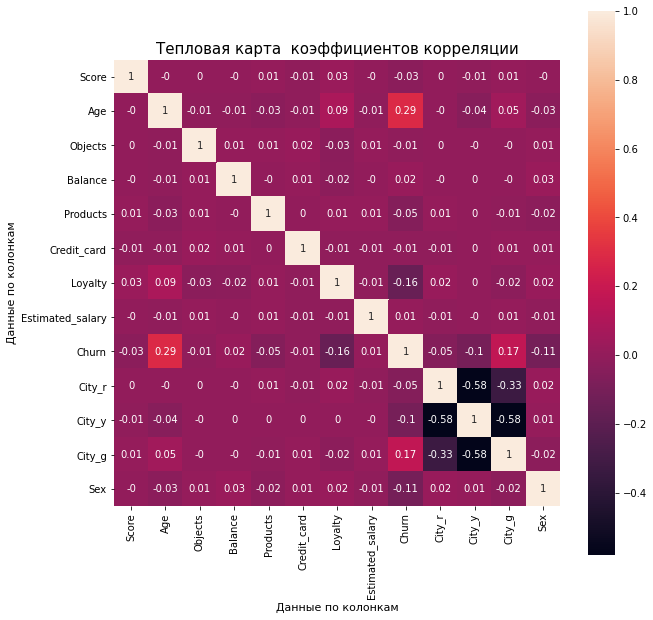

In [21]:
#Для всех пар столбцов, кроме тех которые имею строковый вид, можно найти коэффициент корреляции. 
#Достаточно вызвать метод corr() 

plt.figure(figsize=(10, 10))

sns.heatmap(df_cut.corr().round(2), annot=True,square=True )  # добавляем подписи
            # задаём исходный формат
plt.title('Тепловая карта  коэффициентов корреляции', size=15) # название графика
plt.xlabel('Данные по колонкам', size=11)
plt.ylabel("Данные по колонкам", size=11)
plt.show() 

Градация  цвета от очень темного до очень  светлого показывает  силу корреляции. В нашем случае сильнее  коррелируется  в  положительной динамике (0,28)  возраст к уходe из банка. Но  следует заметить что показатели  очень слабые. Могли бы на них пристальнее обратить внимание  если бы их значение было от + / - 0,5 как корреляция в отрицательной динамике колонки   по филиалам городов друг к другу: от -0,33 до -0,58. В Ростове  Великом  небольшая  корреляция 0,44   по отношению  к наличию  баланса что обусловлено тем  что многих данных по клиентам этого филиала нет, в частности, не будем принимать во внимание эти цифры, но  нужно взять на заметку этот филиал. Общая динамика  воздействия друг на друга  данных по выбранным колонками слабая. 

__Построим boxplot__ 

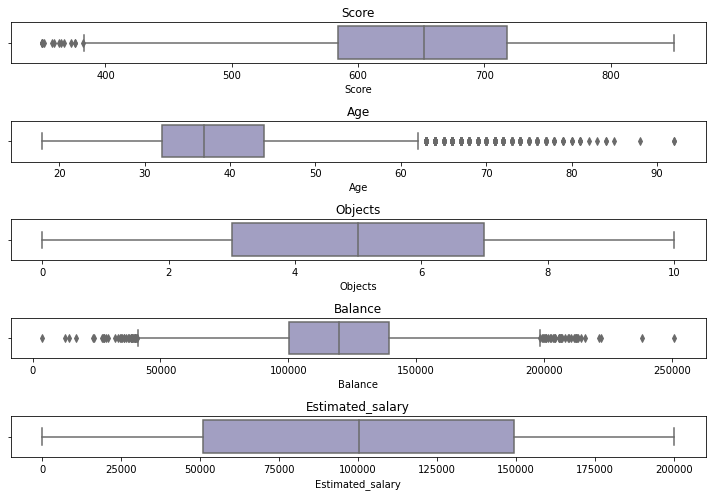

In [22]:
# Этот вид построения эффективно фиксирует сводку данных с помощью простой рамки и усов и позволяет нам легко сравнивать 
#группы данных

colums = ['Score', 'Age', 'Objects', 'Balance', 'Estimated_salary', ]
plt.figure(figsize=(10, 7))
nrows = 5
ncols = 1
for i, col in enumerate(colums):
    sns.boxplot(x =df[col], data = df,palette='Purples', ax = plt.subplot(nrows, ncols, i+1))
    plt.title(col, size=12)
plt.tight_layout()
plt.show()
    
   

- Данные в  колонках Objects  и Estimated_salary  имеют равномерное распределение, их среднее как ранее  мы видели  по describe имеют четкую середину по данным.
- Скоринг - среднее пользователей перекошено вправо, более высокие значения преобладают. НО отметим что в клиентах есть люди с   очень низкими оценками.
- Возраст  - хорошо видны   данные людей пенсионного возраста, их меньше чем подавляющая часть,  пожилых людей в районе 90 лет чрезвычайно мало. 
#(термин Выбросы не могу применять в разрезе Возраст)
-  Напомню что мы более 30 процентов  данных не учитывали в балансе  -по графику видим выбросы  по обеим сторонам  средние значения по Балансу  составляли  - 120  тыс. Много выбросов по обеим сторонам. Есть как экстремально минимальные так и экстремально высокие показатели вне общей массы по отношению   к межквартильному размаху.

__Узнаем сколько всего ушло клиентов из  банка__

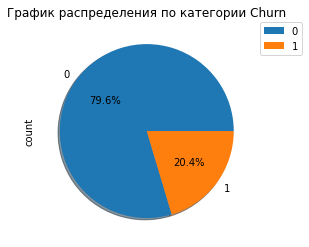

In [23]:
#отберем данные по категориям и посчитаем их
cat_сhurn = df.groupby('Churn')[['Churn']].count().rename(columns = {'Churn':'count'})    

cat_сhurn.sort_values(by ='count', ascending = False)
#дополнительно представим  еще график который покаже процентное соотношение по категориям от общего кол-ва

cat_сhurn.plot(kind = 'pie', shadow = True, subplots=True, autopct='%.1f%%')
plt.title('График распределения по категории Churn')
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show();


По Графику соотношения видим  что 20.4 процента  клиентов ушли из банка. Цифры серьезные. Но за какой период эти цифры?

__Посмотрим на разбивку по  наличию / отсутствия баланса по отношению к тем кто остался/покинул банк__

In [24]:
cat_balance_cut = df.groupby(['Churn','Balance_cut']).agg({'User_id':'count'}).rename(columns ={'User_id': 'Count'})
cat_balance_cut

Count
Churn Balance_cut       
0     0             3117
      1             4846
1     0              500
      1             1537

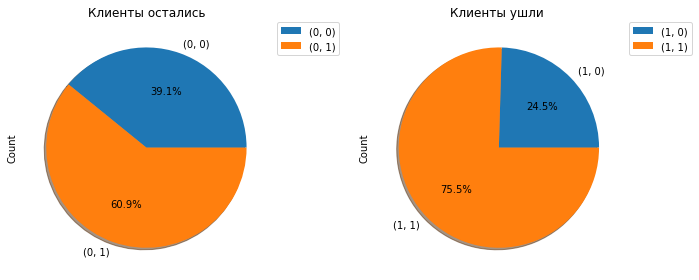

In [25]:
# задаём размер графиков
plt.figure(figsize=(10, 4))

# первый график — pie график  с теми клиентами кто остался,статус 1 - баланс пложительный, 0 - информации о балансе не было
ax1 = plt.subplot(1, 2, 1)
cat_balance_cut.query('Churn == 0').plot(kind = 'pie', ax=ax1, subplots=True, shadow = True, autopct='%.1f%%')
plt.title('Клиенты остались')
plt.legend(loc='lower right')
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )

# второй график — pie с теми клиентами кто ушел,  статус  1 - баланс пложительный, 0 - информации о балансе не было
ax2 = plt.subplot(1, 2, 2)
   
cat_balance_cut.query('Churn == 1').plot(kind = 'pie',  ax=ax2, subplots=True, shadow = True, autopct='%.1f%%')

plt.title('Клиенты ушли ')
plt.legend(loc='lower right')
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )
plt.tight_layout()
plt.show()

Продемонстрировали 2 диаграммы  по оставшимся и ушедшим клиентам. Ораньжевый цвет и это большая часть - информация о Балансе - положительного свойства, а голубым отмечено что информации о балансе нет. Как видим, разница между ними  - 15 процентов.

__Какие данные клиента  в среднем влияют на  лояльность к банку?__

In [26]:
l_b = df.drop(['User_id','City', 'Gender','Balance_cut','City_r', 'City_y', 'City_g'], axis=1)
l_b.groupby('Churn').mean().round()



Score   Age  Objects   Balance  Products  Credit_card  Loyalty  \
Churn                                                                   
0      652.0  37.0      5.0  119536.0       2.0          1.0      1.0   
1      645.0  45.0      5.0  120747.0       1.0          1.0      0.0   

       Estimated_salary  Sex  
Churn                         
0               99738.0  1.0  
1              101466.0  0.0

средний портрет: клиента который потенциально в среднем может уйти: женщина,  с оценкой  банка  -645 баллов, возраст 45 лет, баланс на счете 121 тыс., использует 1 продукт банка, не активный, зар.плата - 101 тыс.
примерный портрет: клиента который потенциально в среднем может остаться: мужчина, возраст 37 лет, баланс на счете 120 тыс., использует 2 продукта банка, активный, зар.плата - 100 тыс.
Все пользуются кредитной картой, владельцы 5 объектов.

__построим pairplot  график совместного распределения: по колонкам  относительно `Churn` — ушёл клиент или нет__

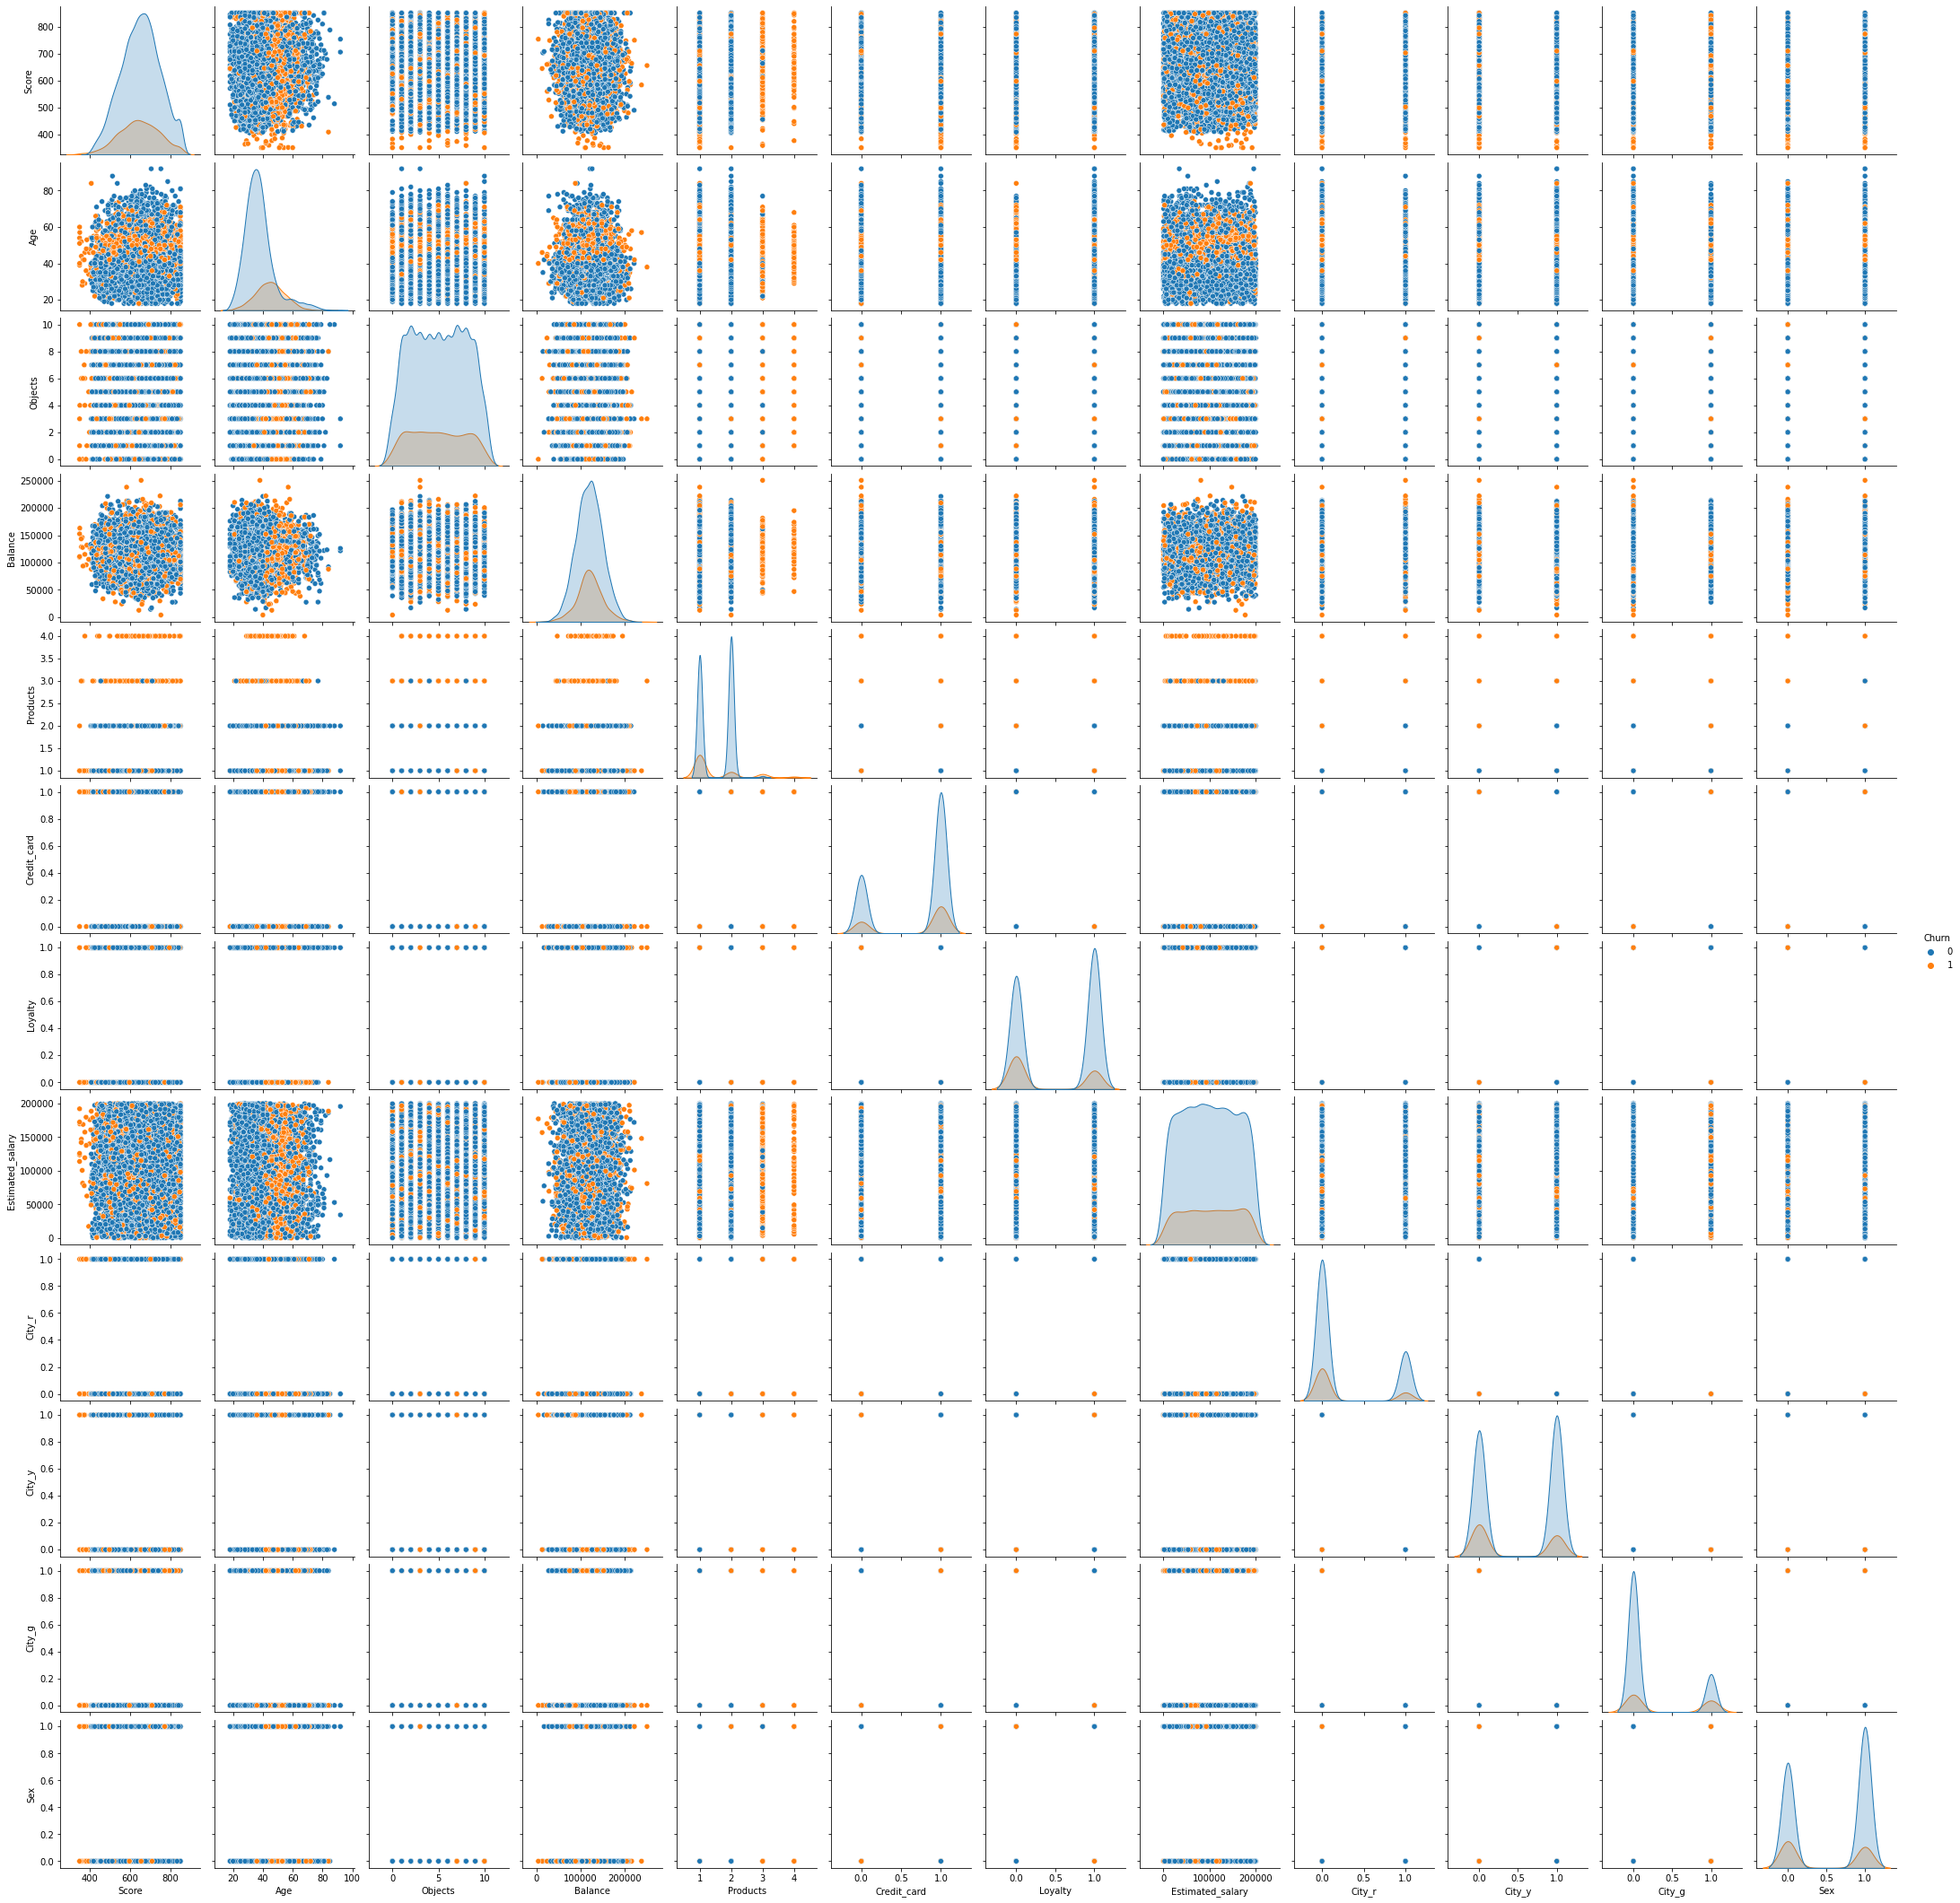

In [27]:
#т.к  колонка с номером клиента не дает существенной информации  относительно 'Churn', мы удалим ее 
#чтобы улучшить визуализацию построения

sns.pairplot(df_cut,  hue = 'Churn') #Доступно третье измерение. Его объявляют в аргументе hue.



- С помощью графика  можем увидеть что возраст  в районе 50 лет и ниже средней по данным фрейма зарплатой имеет склонность уходить.
- Клиенты которые чаще пользуются 3-4 продуктами также   имеют такую тенденцию. 
- Скоринг банка  в размере 500 баллов  и ниже свидетельствует что такие клиенты будут уходить.
- Баланс  клиентов ниже 50 тыс. тоже  показателен для уходящих.
- Владельцев (мужчины - 4 объекта , женщины 7,10 объектов)  также можно добавить в список потенциального оттока.
- Женщины более склонны уходить из банков (особенно в Ярославле) и  женщин меньше чем мужчин в качестве клиентов.


Можно наверное оставить было этот график вместо Матрицы с распределение оттока, но зато мы не обнаружили бы мужчин с целью ухода, здесь - идеи для дальнейшие расследования. Как Вариант - можно сгенерировать стат. гипотезу относительно возраста уходящих и остающихся мужчин. 

Посмотрела с увеличением на огромную Матрицу  с Churn и сделала наметки где дальше "копать" и заинтересованные меня графики вывела отдельно.

<div class="alert alert-info">
<b> V3. Посмотрела с увеличением на огромную Матрицу  с Churn и сделала наметки где дальше "копать" и заинтересованные меня графики вывела отдельно.
</div>

In [28]:
df_some = df[['Age','City','Objects','Sex','Loyalty','Churn' ]]

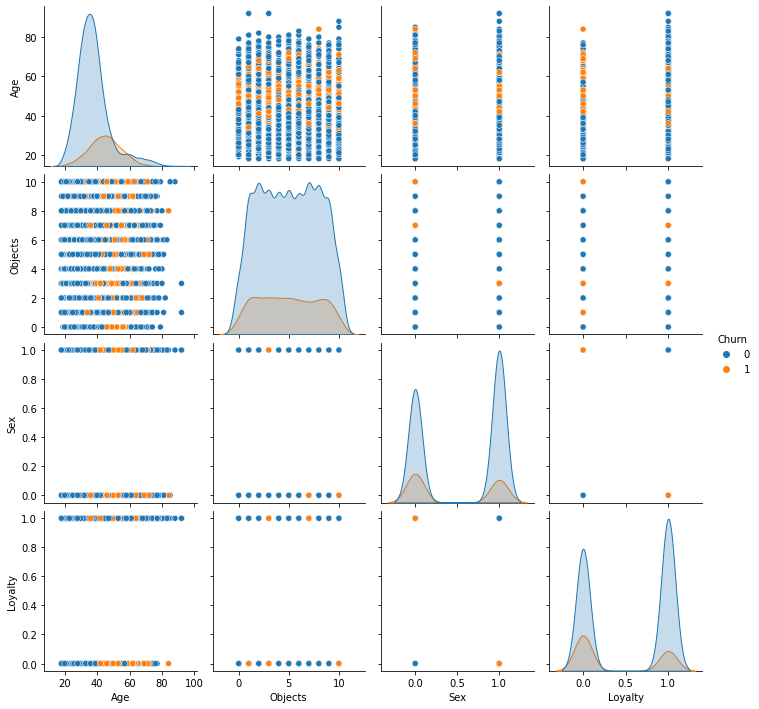

In [29]:

sns.pairplot(df_some,  hue = 'Churn')

Приведу как пример - влияние  пола на возраст и уходящих, здесь видно даже что и мужчины и женщины  в районе 50 лет  хотят уйти, а женщины  помимо 50-летних, при приближении к пенсионному возрасту   имеют такую тенденцию.  Женщины- владелицы 6 и 10 объектами уходят, а мужчины уходят если владеют 3  объектами.   Большая карта нам помогла обратить внимание   на интересные аспекты. Активные - до 40 лет и активность проявляется  после 60 лет у клиентов. Неактивные  клиенты имеют после 40 лет уходить.

__Узнаем как распределяются данные относительно Churn. Построим графики__

In [30]:
# Разделим колонки фрейма на 2 части: категориальному и числовому  типу данных:

num_p =['Score','Objects', 'Age', 'Balance', 'Products', 'Estimated_salary']    #числовой тип данных    
cat_p = ['City','Gender', 'Credit_card','Loyalty','Balance_cut' ]               #категориальный тип данных
 

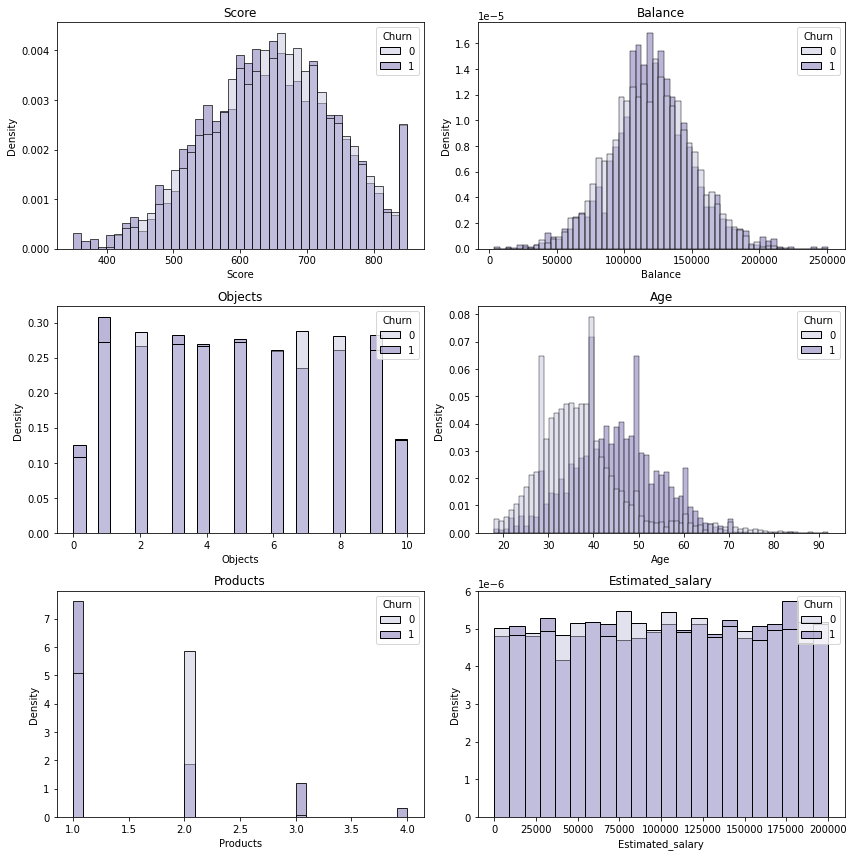

In [32]:
#Построим  распределение относительно числовых типов данных  с разделением на  'Churn' 
num_p_ =['Score','Balance','Objects', 'Age', 'Products', 'Estimated_salary']  
#Построим  распределение относительно числовых типов данных  с разделением на  'Churn' 

plt.figure(figsize=(12, 12))
nrows = 3
ncols = 2
for i, col in enumerate(num_p_):
    sns.histplot(x =df[col], data = df,palette='Purples', hue ='Churn',stat='density', common_norm=False,  ax = plt.subplot(nrows, ncols, i+1))
    plt.title(col, size=12)
plt.tight_layout()
plt.show()

- относительно Скоринга можно заметить что видна разница отностительно уходящих и остающихся, есть  минимальные значения  - меньше 400 (возьмем на заметку для  проверки гипотезы)
- количество объектов  в имуществе также  не сильно сигнализирует об оттоке.
- возраст  подтверждает сигналы о  том что  в районе  50 лет имеют тенденцию к уходу, заметим что количество 50 летних кто остается почти  равно уходящим, обратим внимание и на уходящих  40-летних клиентов - их даже больше по кол-ву (не на много чем  50).
- клиенты пользующиеся 2 продуктами банка  имеют меньшую вероятность уйти, пользующиеся 1 продуктом почти в равной мере могут остаться или уйти. 
- уход клиентов относительно зарплаты  не сильно выражен.

Интересно рассмотреть  уход  клиентов относительно  владения  собственностю

__Узнаем какие собственники более склонны уйти подробнее__

In [33]:
c_objects= df.groupby('Objects').agg({"Churn":['count','sum']})
c_objects['%'] = round(c_objects['Churn']['sum']/c_objects['Churn']['count'], 2) * 100
c_objects = c_objects.rename(columns={'count':'кол-во клиентов', 'sum':'кол-во ушедших'})
c_objects.sort_values('%', ascending = False)

Churn                    %
        кол-во клиентов кол-во ушедших      
Objects                                     
0                   413             95  23.0
1                  1035            232  22.0
9                   984            213  22.0
3                  1009            213  21.0
4                   989            203  21.0
5                  1012            209  21.0
10                  490            101  21.0
6                   967            196  20.0
2                  1048            201  19.0
8                  1025            197  19.0
7                  1028            177  17.0

Более склонны уйти владельцы 0,1,9 объектов собственности,  менее склонны: 2,8,7

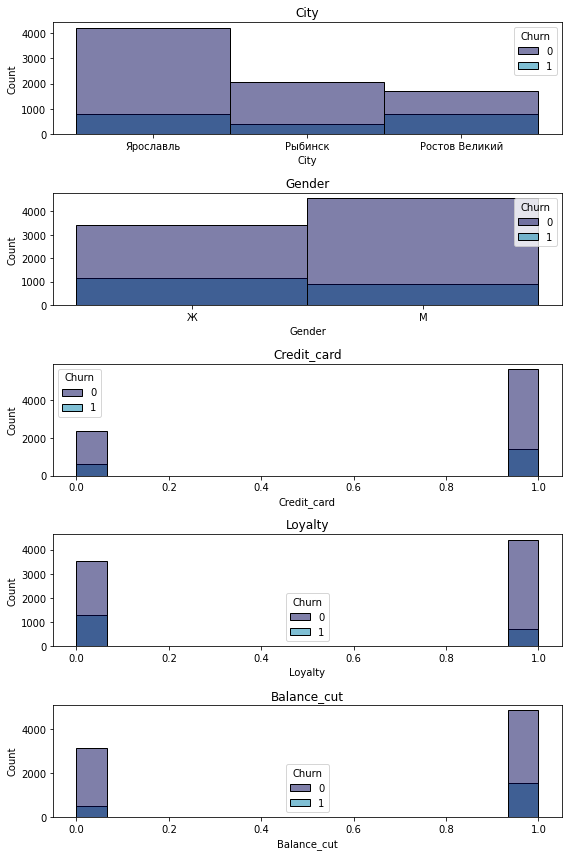

In [34]:
#Построим  распределение относительно категориальных типов данных  с разделением на  'Churn' 

plt.figure(figsize=(8, 12))
nrows = 5
ncols = 1
for i, col in enumerate(cat_p):
    sns.histplot(x =df[col], data = df,palette='ocean',  hue ='Churn',   ax = plt.subplot(nrows, ncols, i+1))
    plt.title( col, size=12)
    plt.tight_layout()
plt.show()



- из Ростова Великого  очень много  клиентов  уходит, в других городах  такой сильной тенденции не замечено.  
- Женщины  чаще  уходят из банка по сравнению с мужчинами. 
- неактивные  клиенты чаще уходят
- обратим внимание что те у кого не нулевой  баланс чаще уходят чем те клиенты у кого  нет баланса - !  и не забудем что  тех у кого не 0 баланс  больше по кол-ву чем  тех у кого 0 баланс. 
Рассмотрим ниже ситуацию по  офисам банков ниже и детальнее

__Сравним доли__

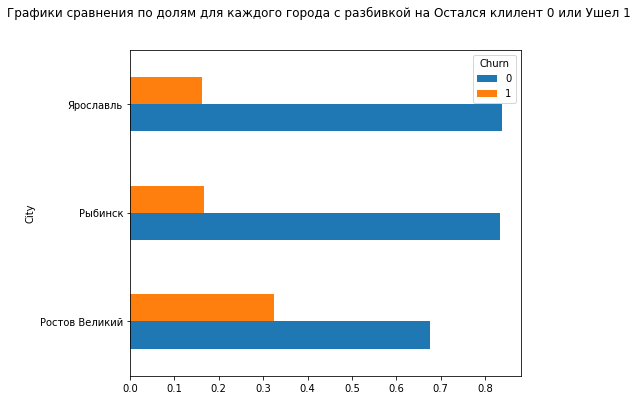

In [35]:
# Создаем таблицу для графиков

pivot = pd.pivot_table(df, values='User_id', index='City', columns='Churn', aggfunc='count', fill_value=0)
pivot = pivot.div(pivot.sum(axis=1), axis=0)
    
    # Создаем график
plt.rcParams['figure.figsize'] = [7, 6]
pivot.plot(kind='barh', )
    
# Устанавливаем заголовок таблицы
plt.suptitle('Графики сравнения по долям для каждого города с разбивкой на Остался клилент 0 или Ушел 1')
# Отображаем таблицу
plt.show()

In [36]:
cat_p_ = ['Gender', 'Credit_card', 'Loyalty', 'Balance_cut']

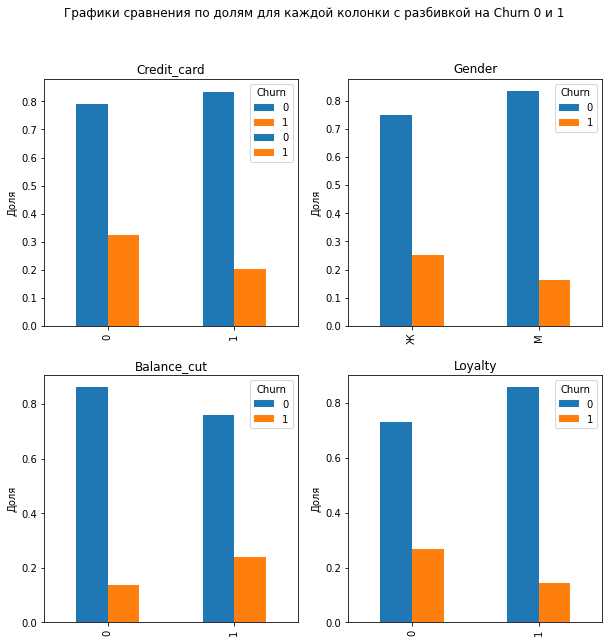

In [37]:
# Создаем таблицу для графиков
fig, axs = plt.subplots(len(cat_p_)//2, 2, figsize=(10, 10))
# Проходим по списку колонок
for i, cat in enumerate(cat_p):
    # Создаем сводную таблицу с долями для каждой категории и churn=0/1
    pivot = pd.pivot_table(df, values='User_id', index=cat, columns='Churn', aggfunc='count', fill_value=0)
    pivot = pivot.div(pivot.sum(axis=1), axis=0)
    
    # Создаем график
    row = i//3
    col = i%2
    pivot.plot(kind='bar', ax=axs[row, col])
    axs[row, col].set_title(cat)
    axs[row, col].set_xlabel('')
    axs[row, col].set_ylabel('Доля')
    
# Устанавливаем заголовок таблицы
plt.suptitle('Графики сравнения по долям для каждой колонки с разбивкой на Churn 0 и 1')
# Отображаем таблицу
plt.show()

__Посчитаем сколько клиентов ушло из  отделений банка__

In [38]:
c_city= df.groupby('City').agg({"Churn":['count','sum']})
c_city['%'] = round(c_city['Churn']['sum']/c_city['Churn']['count'], 2)   * 100
c_city = c_city.rename(columns={'count':'кол-во клиентов', 'sum':'кол-во ушедших'})
c_city

Churn                    %
               кол-во клиентов кол-во ушедших      
City                                               
Ростов Великий            2509            814  32.0
Рыбинск                   2477            413  17.0
Ярославль                 5014            810  16.0

Наибольшие показатели  по оттоку  клиентов у Ростова Великого.
На Филиал нужно обратить пристальное внимание.

__Какие есть разграничения по половому признаку у клиентов банка__

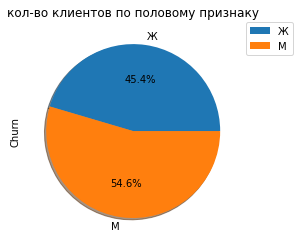

In [39]:
genders = df.groupby('Gender')['Churn'].count()
plt.figure(figsize=(4, 4))
genders.plot(kind = 'pie', shadow = True, subplots=True, autopct='%.1f%%')
plt.title('кол-во клиентов по половому признаку')
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )
plt.show();

женщин - клиентов меньше чем мужчин.   Ж - 45,4%, М - 54,6 %. а как ранее видели, женщин уходят  больше


In [40]:
g_bank= df.groupby('Gender').agg({"Churn":['count','sum']})
g_bank['%'] = round(g_bank['Churn']['sum']/g_bank['Churn']['count'], 2)   * 100
g_bank = g_bank.rename(columns={'count':'кол-во ', 'sum':'кол-во ушедших'})
g_bank

Churn                    %
       кол-во  кол-во ушедших      
Gender                             
Ж         4543           1139  25.0
М         5457            898  16.0

Больше всего ушло женщин - 25 %

__Рассмотрим данные относительно разбивки по городам__

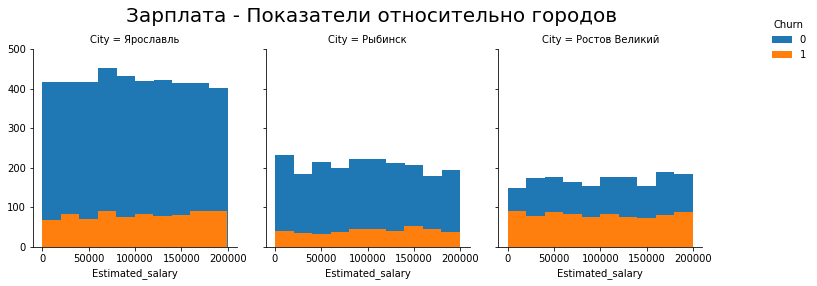

In [41]:
# Зарплата
g = sns.FacetGrid(data=df, col = "City", hue = 'Churn')
g.map(plt.hist, 'Estimated_salary')
# Устанавливаем общий заголовок
g.fig.set_figheight(4)
g.fig.set_figwidth(10)
g.set( ylim=(0, 500));
g.fig.suptitle('Зарплата - Показатели относительно городов', y = 1.03, fontsize = 20);
g.add_legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )

In [42]:
city_e = df.groupby(['City', 'Churn']).agg({"Estimated_salary":['min','mean','max']}).round(2)
city_e

Estimated_salary                      
                                  min       mean        max
City           Churn                                       
Ростов Великий 0               343.38  102414.66  199970.74
               1                11.58   98403.89  199808.10
Рыбинск        0               479.54   98602.37  199992.48
               1               417.41  103629.55  199304.74
Ярославль      0                90.07   99217.10  199929.17
               1               123.07  103439.28  199378.58

В Ростове  Великом  средняя зарплата (в среднем) среди тех кто ушел была  98 тыс, а в Рыбинске - 104 тыс, Ярославле - 103 тыс. Следует отметить что зарплата (в среднем) среди тех кто остался  иная- в Ростове Великом она больше всех 102 тыс, а вот в Рыбинске - на последнем месте - 99 тыс. Есть очень низкие 

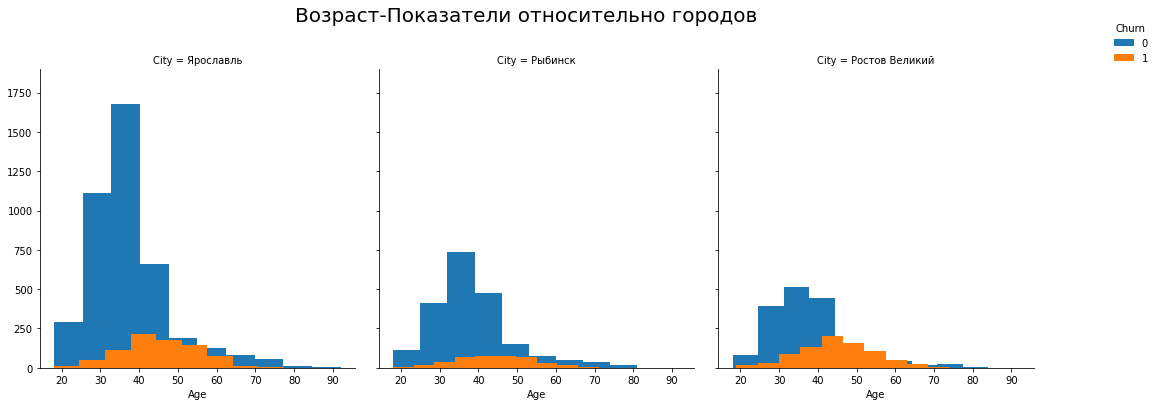

In [43]:

g = sns.FacetGrid(data=df, col = "City", hue = 'Churn')
g.map(plt.hist, 'Age')
# Устанавливаем общий заголовок
g.fig.set_figheight(6)
g.fig.set_figwidth(15)
g.set( ylim=(0, 1900));
g.fig.suptitle('Возраст-Показатели относительно городов', y = 1.03, fontsize = 20);
g.add_legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )

In [44]:
city_a = df.groupby(['City', 'Churn']).agg({"Age":['min','mean','max']}).round(2)
city_a

Age           
                     min   mean max
City           Churn               
Ростов Великий 0      18  37.31  84
               1      19  44.89  74
Рыбинск        0      18  37.84  88
               1      18  44.15  71
Ярославль      0      18  37.24  92
               1      18  45.13  84

В Рыбинске  в среднем самые молодые (44,15 лет) желающие покинуть банк, средний возраст кто остается - 38. В Ростове Великом  покидающие банк имею возраст  около  45 лет, а остаются около  37. Ярославль - уходят 45 летние. остаются 37 летние(в среднем).  В Ярославле  92 летний  самый возрастной клиент остался в банке. Но обращаем внимание что количество клиентов в отделениях разное.

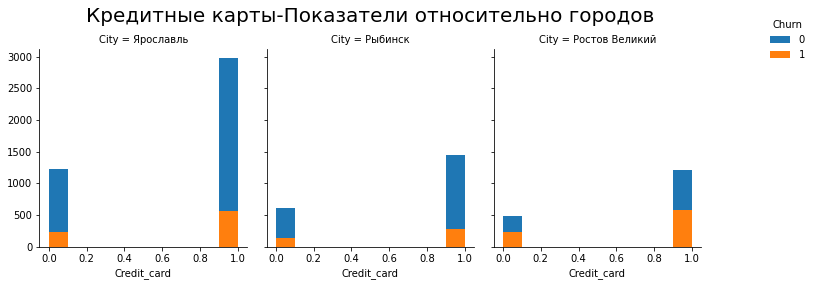

In [45]:
g = sns.FacetGrid(data=df, col = "City", hue = 'Churn', )
g.map(plt.hist,   'Credit_card',)
# Устанавливаем общий заголовок
g.fig.set_figheight(4)
g.fig.set_figwidth(10)
g.fig.suptitle('Кредитные карты-Показатели относительно городов', y = 1.03, fontsize = 20);
g.add_legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )


In [46]:
city_с = df.groupby(['City', 'Churn']).agg({"Credit_card":['count']})
city_с

Credit_card
                           count
City           Churn            
Ростов Великий 0            1695
               1             814
Рыбинск        0            2064
               1             413
Ярославль      0            4204
               1             810

В Ростове Великом  меньше всего было  пользователей карт - 1695 чел. Максимум у Ярославля - 4204. 

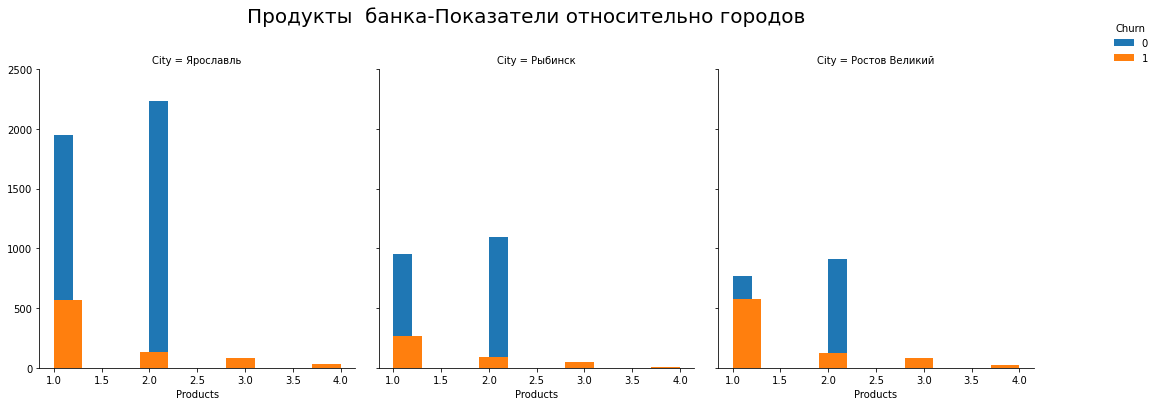

In [47]:

g = sns.FacetGrid(data=df, col = "City", hue = 'Churn')
g.map(plt.hist, 'Products')
# Устанавливаем общий заголовок
g.fig.set_figheight(6)
g.fig.set_figwidth(15)
g.set( ylim=(0, 2500));
g.fig.suptitle('Продукты  банка-Показатели относительно городов', y = 1.03, fontsize = 20);
g.add_legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )

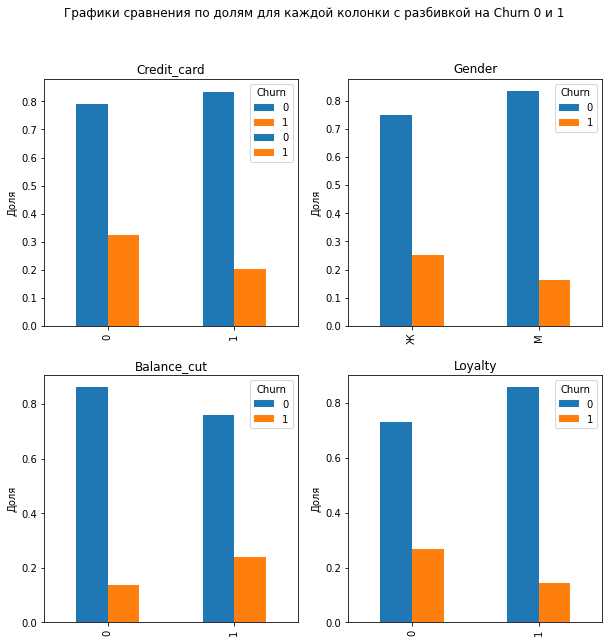

In [48]:
# Создаем таблицу для графиков
fig, axs = plt.subplots(len(cat_p_)//2, 2, figsize=(10, 10))
# Проходим по списку колонок
for i, cat in enumerate(cat_p):
    # Создаем сводную таблицу с долями для каждой категории и churn=0/1
    pivot = pd.pivot_table(df, values='User_id', index=cat, columns='Churn', aggfunc='count', fill_value=0)
    pivot = pivot.div(pivot.sum(axis=1), axis=0)
    
    # Создаем график
    row = i//3
    col = i%2
    pivot.plot(kind='bar', ax=axs[row, col])
    axs[row, col].set_title(cat)
    axs[row, col].set_xlabel('')
    axs[row, col].set_ylabel('Доля')
    
# Устанавливаем заголовок таблицы
plt.suptitle('Графики сравнения по долям для каждой колонки с разбивкой на Churn 0 и 1')
# Отображаем таблицу
plt.show()

In [49]:
city_p = df.groupby(['City', 'Churn', 'Products']).agg({"Products":['count']})
city_p

Products
                                 count
City           Churn Products         
Ростов Великий 0     1             771
                     2             914
                     3              10
               1     1             578
                     2             126
                     3              86
                     4              24
Рыбинск        0     1             954
                     2            1096
                     3              14
               1     1             267
                     2              87
                     3              52
                     4               7
Ярославль      0     1            1950
                     2            2232
                     3              22
               1     1             564
                     2             135
                     3              82
                     4              29


Всеми 4 продуктами  пользуются  только те кто уходит. Лояльные  банку клиенты достаточно консервативны и пользуются максимум 3. Такая тенденция прослеживается во всех отделениях банка. Данные о пользовании 3 и 4 продуктами  среди тех кто ушел в Ярославле  и Ростове великом очень похожа - 3 продукта используют 82/86 чел, 4 продукта - 29/24.


__Рассмотрим Ростов Великий отдельно (как самый проблемный филиал)__

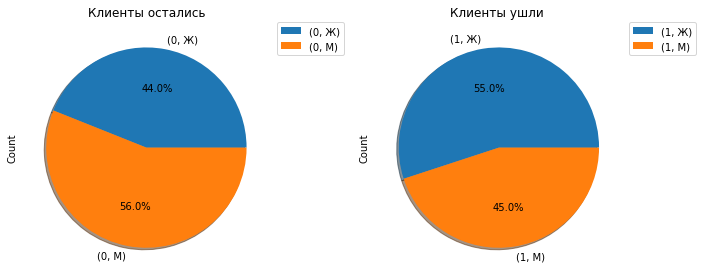

In [50]:
rv = df.query('City == "Ростов Великий"')
rv_gender = rv.groupby(['Churn','Gender']).agg({'User_id':'count'}).rename(columns ={'User_id': 'Count'})
rv_gender
# задаём размер графиков
plt.figure(figsize=(10, 4))

# первый график — pie график  с теми клиентами кто остался,статус 1 - баланс пложительный, 0 - информации о балансе не было
ax1 = plt.subplot(1, 2, 1)
rv_gender.query('Churn == 0').plot(kind = 'pie', ax=ax1, subplots=True, shadow = True, autopct='%.1f%%')
plt.title('Клиенты остались')
plt.legend(loc='lower right')
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )

# второй график — pie с теми клиентами кто ушел,  статус  1 - баланс пложительный, 0 - информации о балансе не было
ax2 = plt.subplot(1, 2, 2)
   
rv_gender.query('Churn == 1').plot(kind = 'pie',  ax=ax2, subplots=True, shadow = True, autopct='%.1f%%')

plt.title('Клиенты ушли ')
plt.legend(loc='lower right')
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 )
plt.tight_layout()
plt.show()

Женщины в Ростове Великом уходят  больше чем мужчин  на  10%.

__Скоринг клиентов в Ростове Великом с разбивкой  по уходящим и остающимся__

In [51]:
rv.groupby(['Churn']).agg({'Score':['min','mean', 'max']}).round()

Score            
        min   mean  max
Churn                  
0       405  653.0  850
1       350  648.0  850

Скоринг у уходящих из  отделения в Ростове Великом  заметно отличается  в минимальных размерах. До 405 баллов- клиент уйдет. Видим что даже средние показатели тех кто уходит немного не дотягивает до средних кто остался.

__Создадим список областей которые хотим посмотреть отдельно по проблемому Ростову Великому__

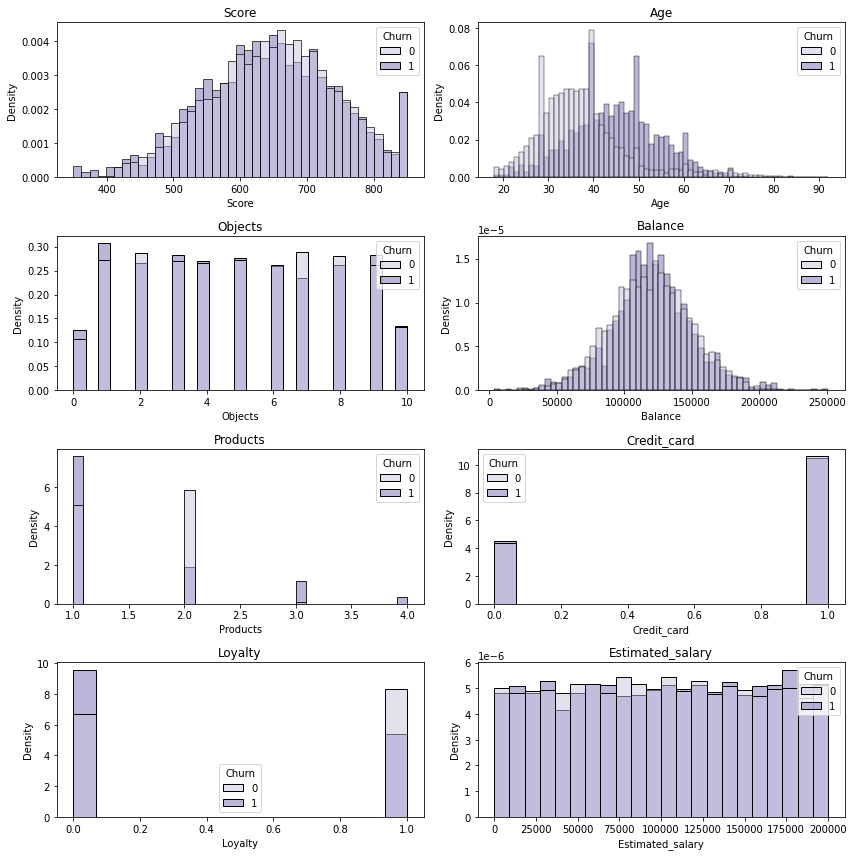

In [52]:
spis = ['Score','Age','Objects', 'Balance','Products', 'Credit_card', 'Loyalty', 'Estimated_salary'] # список колонок

num_p_ =['Score','Balance','Objects', 'Age', 'Products', 'Estimated_salary']  
#Построим  распределение с разделением на  'Churn' 

plt.figure(figsize=(12, 12))
nrows = 4
ncols = 2
for i, col in enumerate(spis):
    sns.histplot(x =df[col], data = df,palette='Purples', hue ='Churn',stat='density', common_norm=False,  ax = plt.subplot(nrows, ncols, i+1))
    plt.title(col, size=12)
plt.tight_layout()
plt.show()

Молодежь (до 40 лет) остается  в банке но уже 40-50 возраста имеют сильную выраженность к оттоку. Группы довольно сильно выражены. Владельцы  только  2, 7 и 8   объектов скорее оснанутся, у всех остальных большая вероятность уйти. Баланс Также и карты - не влияют на отток. Интересное по  активности - отточные клиенты  довольно активны. По заработной плате сильных различий не видно.


В исследовательском анализе выяснили "средний" портрет клиента банка используя функцию describe:
Скоринг клиентов показывает разброс от 97-850 баллов, в среднем 652,
возраст от 18 до 92 лет, в среднем 37,
Владение объектами: от 0 до 10, в среднем 5,
Баланс от 3,8 тыс до 251 тыс., в среднем 120 тыс.
В среднем 1 продуктом пользуются клиенты, хотя максимум их 4,
в среднем у клиента есть кредитка, активный пользователь,
з-та клиентов от 11,58 руб. до 200 тыс -максимум, в среднем з-та 100 тыс,
Построили Матрицу диаграммы рассеяния. Сильные линейные влияния значений по колонкам заметить трудно.
Построен heatmap коэффициентов корреляции по колонкам - Общая динамика воздействия друг на друга данных по выбранным колонками слабая.
Построен boxlot по колонкам:'Score', 'Age', 'Objects', 'Balance', 'Estimated_salary'
•	В колонках кол-во объектов и з-та имеют равномерное распределение, их средние четко выражены по середине всей массы данных.
•	Скоринг клиентов - среднее пользователей перекошено вправо, более высокие значения преобладают. НО отметим что в клиентах есть люди с очень низкими оценками.
•	Возраст - в среднем между 30 и 40,небольшая часть пенсионного возраста, их меньше чем подавляющая часть, их мало.
•	По зарплате много выбросов по обеим сторонам. Есть как экстремально минимальные так и экстремально высокие показатели вне общей массы по отношению к межквартильному размаху.
По Графику соотношения по Churn (ушел клиент из банка или нет) видим что 20.4 процента клиентов ушли из банка. Цифры серьезные. Но за какой период эти цифры? Что происходило в то время?
Построили pairplot график совместного распределения: по колонкам b относительно Churn — ушёл клиент или нет__
Построены распределения относительно статусов клиентов(ушел /нет). На основании категориальных и числовых типах данных колонок.


Из Ростова Великого уходит больше клиентов, в других городах такой сильной тенденции не замечено.
-Ростов Великий 32 % всех клиентов -Рыбинск 17 % всех клиентов -Ярославль 16 % всех клиентов
Женщины чаще уходят из банка по сравнению с мужчинами. в то время как всего женщин - клиентов меньше чем мужчин. Ж - 45,4 %, М - 54,6 %.

Неактивность - признак того что не уйдет клиент.
Продемонстрировали 2 диаграммы по оставшимся и ушедшим клиентам. Узнали разницу в процентном соотношении по имеющимся и отсутствующим данным относительно Баланса.
Портрет человека который склонен чтобы уйти из банка:
•	клиент в возраст в районе 40 и 50 лет
•	чаще женщины,
•	с з-той ниже средней (100 тыс.),
•	в большей степени пользуются 3-4 продуктами,
•	скоринг банка в размере 500 баллов и ниже,
•	баланс клиентов ниже 50 тыс.,
•	владельцы 0,1,9 объектов собственности.



__Портрет оставшихся клиентов (дополнение):__
в основном  жители Ярославля - но это все  же центр, более кол-во клиентов
- пользователь  1 -2 продуктами,
- мужчины в возрасте  до 37 лет,  и после 60
- баланс на счете 120 тыс., 
- пользователь активный, 
- зарплата - 100 тыс. 
- дамы до 40 лет еще остаются в банке а далее просматривается тенденция уходить 
- активные клиенты до 40 лет.
- чаще жители Ярославля
     
        

Как ранее было замечено, из Ростова Великого уходит больше клиентов, это областной город.

- В Ростове Великом средняя зарплата (в среднем) среди тех кто ушел была 98 тыс, она меньше чем в Рыбинске - 104 тыс, Ярославле - 103 тыс. Следует отметить что зарплата (в среднем) среди тех кто остался иная- в Ростове Великом она больше всех 102 тыс, а вот в Рыбинске - на последнем месте - 99 тыс. 
- Также  в Ростове Великом   45 летние в основном уходят. А в Ярославле это четко выраженные  40-летние, а в Рыбинске  верхняя  планка  ухода сильно размыта  от 35 до 55. В Ростове В.  несмотря на то что это областной  город кол-во ушедших пользователей  4 -мя продуктами    пользовались  почти на уровне   центра - Ярославля.
- В Ростове  В. также не  смотря на общую казалось бы тенденцию уходить пользователям 4 продуктов,  покидают филиал и пользователи 1 продукта - очень сильная аномалия.
- Из Ростова Великого если взять всех ушедших, 55 %  составили женщин по сравнению с 45% мужчин.
- Скоринг у уходящих из  отделения в Ростове Великом  заметно отличается  в минимальных размерах. по сравнению с реми кто остается  - на 50 пунктов, почти выравнивается к средним значениям тех кто уйдет. т.е. скоринг клиентов до 405 и ниже -  большая вероятность что клиенты уйдут.
арплата между остающимися и уходящими не сильно отличается.

- Молодежь (до 40 лет) остается  в банке но уже с  40-50 возраста имеют сильную выраженность к оттоку. Эти Группы довольно сильно выражены. Владельцы  только  2, 7 и 8   объектов скорее останутся, у всех остальных большая вероятность уйти. Баланс как и карты - не влияют на отток. Интересное по  активности - уходящие клиенты  довольно активны. 


Портрет уходящих клиентов:

- Женщины более склонны к уходу из банка.
- Неактивные клиенты чаще уходят. Владельцев 0,  1, 9 объектов,  и меньше также можно добавить в список потенциального - оттока, менее склонны к уходу  владельцы: 
- Баланс клиентов ниже 50 тыс. 
- Скоринг 500 баллов и ниже свидетельствует что такие клиенты имеют тенденцию уходить. 
- Характерен возраст 50 летних мужчин и ниже средней по предоставленным данных зарплатой.
- Группа 45-летних, пенсионный возраст.
- Пользуются 1(большой отток), 3-4 продуктами.

	Портрет остающихся:

- Мужчины 
- Неактивные
- Владельцы  2, 7 и 8   объектов
- Молодежь до 40 и глубокие пенсионеры . 
- Клиенты по убывающей: Ярославль, Рыбинск,  Ростов Великий 
- пользователи 1 -2 продуктами

Яркой выраженной разницы между уровнем заработной платой, доходом  наличием карты между теми кто остается и уходит -  нет.



## Сформулируем и проверим статистические гипотезы

__Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.__

_Сформулируем (нулевую) H₀ гипотезу: различий дохода между теми клиентами, которые ушли и теми, которые остались нет, все одинако_

_Сформулируем (альтернативную) H1 гипотезу:различия дохода между теми клиентами, которые ушли и теми, которые остались существуют._




- Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны. Мы можем лишь сделать предположение.  Это не  утверждение.

- Проверка двусторонней гипотезы в python: t-тест. В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам:  scipy.stats.ttest_ind (array1, array2, equal_var) .

Методу передают параметры:

array1, array2 — массивы, содержащие выборки;
equal_var (от англ. equal variance — «равная дисперсия») — необязательный параметр, задающий, считать ли равными дисперсии выборок. Передаётся как equal_var = True или equal_var = False (True — считать, False — не считать).


- Гипотезы связаны со средними значениями.
- На практике необходимо понять, равны ли средние. Делать вывод о равенстве нужно по выборкам, и для этого понадобятся не только выборочные средние, но и выборочные дисперсии, потому что разброс данных в совокупностях может повлиять на результат статистического теста. Если разброс данных большой, то небольшая разница между выборочными средними может быть простой случайностью. А если разброс маленький, то даже небольшая разница может означать существенное различие между средними.

_Что такое p-value_

- Это вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, что нулевая гипотеза верна. Возвращая этот результат, метод  строит распределение со значением, полученным на выборке, и подсчитывает вероятность, что оно могло оказаться там или ещё дальше от центра 
- Важно: p-value возвращается двусторонней. То есть можно сразу понять, отвергать двустороннюю гипотезу или нет, сравнив это значение с выбранным уровнем значимости.
- Если p-value больше 10%, то нулевую гипотезу точно не нужно отвергать. Меньше — возможно, стоит. Общепринятые пороговые значения — 5% и 1%.

- Если значений в выборке много (30 и больше), то распределение настолько близко к нормальному, но чтобы не усложнять себе жизнь выбором нужного теста, принято просто каждый раз применять t-тест — ведь он работает для выборки любого размера.


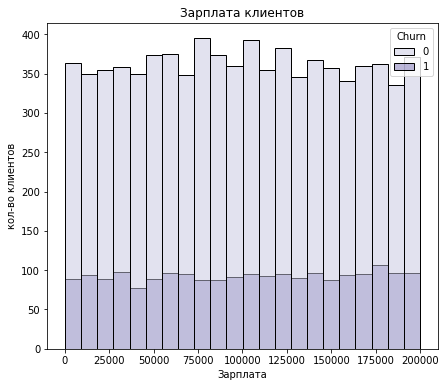

In [53]:
# Построим гистограмму с разделением по зарплате по клиентам которые ушли и остались  в банке

sns.histplot(x = 'Estimated_salary', data = df,palette='Purples', hue ='Churn')
plt.title('Зарплата клиентов', size=12)
plt.xlabel('Зарплата')
plt.ylabel('кол-во клиентов')

plt.show()

In [54]:
# отберем  данные  для анализа по признаку наличия или ухода клиентов
df_est_0 = df.query('Churn==0')['Estimated_salary']  
df_est_1 = df.query('Churn==1')['Estimated_salary']

Если выборки разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные — укажим equal_var = False при вызове метода scipy.stats.ttest_ind().

В остальных случаях используем тест без изменений.

In [55]:
# узнаем  кол-во  в  каждой из выборок
print(f'Длина выборки составляет: {len(df_est_0)} значений')
df_est_0.describe()

Длина выборки составляет: 7963 значений


count      7963.000000
mean      99738.391772
std       57405.586966
min          90.070000
25%       50783.490000
50%       99645.040000
75%      148609.955000
max      199992.480000
Name: Estimated_salary, dtype: float64

len/count говорят что длины  более чем достаточно для  корректного проведения теста

In [56]:
print(f'Длина выборки составляет: {len(df_est_1)} значений')
df_est_1.describe()

Длина выборки составляет: 2037 значений


count      2037.000000
mean     101465.677531
std       57912.418071
min          11.580000
25%       51907.720000
50%      102460.840000
75%      152422.910000
max      199808.100000
Name: Estimated_salary, dtype: float64

In [57]:
# len/count говорят что длины  данных более чем достаточно для  корректного проведения теста

_Если известно, что датасет — не вся совокупность, а выборка из неё, вместо дисперсии считают её оценку по имеющейся выборке (то есть s², а не σ²). Для этого в методе var() указывают параметр ddof=1 :_

Для нормальных распределений верно правило трёх стандартных отклонений, или правило трёх сигм. Оно гласит: практически все значения (около 99%) находятся в промежутке
(\mu - 3\sigma, \mu + 3\sigma).(μ−3σ,μ+3σ).
Это правило позволяет находить интервал, куда наверняка попадут практически все значения интересующей нас переменной


Судя по графику, распределение явно не нормальное.
Распределение не в виде колокола, словно по линейке выверено.
Но это условие не препятствие. Благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. Напомним, это утверждение верно, даже если сама генеральная совокупность не распределена нормально + не зря мы считали кол-во  данных по быборкам и  далее мы считаем  стандартные отклонения и  дисперсии  чтобы узнать  равные они или нет и поэтому далее применяли к st.ttest_ind , equal_var = False.

In [58]:
df_est_0 # выборка

variance_estimate_0 = np.var(df_est_0, ddof=1)
print(f'Дисперсия  по выборке df_est_0 равна {round(variance_estimate_0, 2)}')

standard_deviation_0 = np.sqrt(variance_estimate_0)
print(f'Стандартное отклонение  по выборке df_est_0 равно {round(standard_deviation_0, 2)}')

print('-'* 7)


df_est_1 # выборка
variance_estimate_1 = np.var(df_est_1, ddof=1)
print(f'Дисперсия  по выборке df_est_1 равна {round(variance_estimate_1, 2)}')

standard_deviation_1 = np.sqrt(variance_estimate_1)
print(f'Стандартное отклонение  по выборке df_est_1 равно {round(standard_deviation_1, 2)}')





Дисперсия  по выборке df_est_0 равна 3295401414.92
Стандартное отклонение  по выборке df_est_0 равно 57405.59
-------
Дисперсия  по выборке df_est_1 равна 3353848166.81
Стандартное отклонение  по выборке df_est_1 равно 57912.42


Отметим  что дисперсии  и стандартные отклонения по выборкам похожи но не равны. Мы расчитали  стандартное отклонение, но в describe  эти данные  можно увидеть в  std.


Мы  будем использовать дополнительный параметр equal_var = False, потому что у нас достаточно большие  по размеру выборки, но различия все же есть и существенные.
Еще одно из критических условий  использование дополнительного параметр equal_var = False: Дисперсии рассматриваемых генеральных совокупностей должны быть равны, у нас же нет  точного равенства.


In [59]:
# проведем тест для подтверждения/опровержения гипотез выдвинутых ранее

alpha =0.01 # критический уровень статистической значимости если p-value окажется меньше него - отвергнем гипотезу
            # будем очень критичны и установим уровень максимальный - 0,01

results = st.ttest_ind(  df_est_0,  df_est_1, equal_var = False)
print('p-значение:', round(results.pvalue, 2))

if results.pvalue < alpha:
          print("Отвергаем нулевую гипотезу")
else:
          print("Не получилось отвергнуть нулевую гипотезу")



p-значение: 0.23
Не получилось отвергнуть нулевую гипотезу



В связи с тем что  p - value по результату теста оказалось 23 процента, мы  НЕ можем отвергнуть гипотезу что  нет различий  в  доходах между теми кто остался в банке и теми кто ушел.
Нет  статистистической значимости различий  в зар.плате между теми кто остался и ушел.


___

__Проверим гипотезу о равенстве  скоринга клиентов которые остались и которые ушли из банка__

_Сформулируем (нулевую) H₀ гипотезу: различий в скоринге банка  между теми клиентами, которые ушли и теми, которые остались нет, все одинако_

_Сформулируем (альтернативную) H1 гипотезу: различия в скоринге банка  между теми клиентами, которые ушли и теми, которые остались существуют._

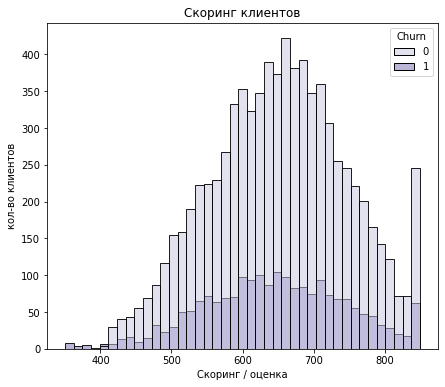

In [60]:
# Построим гистограмму с разделением по  клиентам которые ушли и остались  в банке
sns.histplot(x = 'Score', data = df, palette='Purples', hue ='Churn')
plt.title('Скоринг клиентов', size=12)
plt.xlabel('Скоринг / оценка')
plt.ylabel('кол-во клиентов')

plt.show()

In [61]:
# отберем  данные  для анализа по признаку наличия или ухода клиентов
df_scor_0 = df.query('Churn==0')['Score']  
df_scor_1 = df.query('Churn==1')['Score']  

In [62]:
#  выведем данные по выборкам
print(df_scor_0.describe())
print('-'* 7)
print(df_scor_1.describe())

count    7963.000000
mean      651.853196
std        95.653837
min       405.000000
25%       585.000000
50%       653.000000
75%       718.000000
max       850.000000
Name: Score, dtype: float64
-------
count    2037.000000
mean      645.351497
std       100.321503
min       350.000000
25%       578.000000
50%       646.000000
75%       716.000000
max       850.000000
Name: Score, dtype: float64


In [63]:
print(f'Длина выборки df_scor_0  составляет: {len(df_scor_0)} значений')
print(f'Длина выборки  df_scor_1 составляет: {len(df_scor_1)} значений')

Длина выборки df_scor_0  составляет: 7963 значений
Длина выборки  df_scor_1 составляет: 2037 значений


In [64]:
df_scor_0 # выборка

variance_estimate_0 = np.var(df_scor_0, ddof=1)
print(f'Дисперсия  по выборке df_scor_0 равна {round(variance_estimate_0, 2)}')

standard_deviation_0 = np.sqrt(variance_estimate_0)
print(f'Стандартное отклонение  по выборке df_scor_0 равно {round(standard_deviation_0, 2)}')

print('-'* 7)


df_scor_1 # выборка
variance_estimate_1 = np.var(df_scor_1, ddof=1)
print(f'Дисперсия  по выборке df_scor_1 равна {round(variance_estimate_1, 2)}')

standard_deviation_1 = np.sqrt(variance_estimate_1)
print(f'Стандартное отклонение  по выборке df_scor_1 равно {round(standard_deviation_1, 2)}')


Дисперсия  по выборке df_scor_0 равна 9149.66
Стандартное отклонение  по выборке df_scor_0 равно 95.65
-------
Дисперсия  по выборке df_scor_1 равна 10064.4
Стандартное отклонение  по выборке df_scor_1 равно 100.32


Мы  снова будем использовать дополнительный параметр equal_var = False, потому что у нас достаточно большие  по размеру выборки, но различия все существенные.
Дисперсии рассматриваемых генеральных совокупностей должны быть равны, у нас же нет  точного равенства.

In [65]:
# проведем тест для подтверждения/опровержения гипотез выдвинутых ранее

alpha =0.01 # критический уровень статистической значимости если p-value окажется меньше него - отвергнем гипотезу
            # будем очень критичны и установим уровень максимальный - 0,01

results = st.ttest_ind(  df_scor_0,  df_scor_1, equal_var = False)
print('p-значение:', round(results.pvalue, 4))

if results.pvalue < alpha:
          print("Отвергаем нулевую гипотезу")
else:
          print("Не получилось отвергнуть нулевую гипотезу")



p-значение: 0.0085
Отвергаем нулевую гипотезу



В связи с тем что значение p - value по результату теста оказался меньше 1 процента, а мы установили  критический аспект - alpha = 0.01, можем отвергнуть гипотезу что  нет различий  в   оценках скоринга банка между теми кто остался и ушел.

Существуют статистическая значимые  различия  в баллах скоринга между теми кто остался и ушел.


___

__Мы провели 2 статистических теста  с помощью st.ttest_ind  - это специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.__

1 -м был тест о равенстве  зарплат тех  клиентов кто ушел и кто остался в банке. В связи с тем что  p - value по результатам теста оказался 23 процента, мы  НЕ  смогли отвергнуть  0 гипотезу что  нет различий  в  доходах. 
Нет  статистистической значимости различий  в зар.плате между теми кто остался и ушел.


2 -м был тест о равенстве  скоринга тех  клиентов кто ушел и кто остался в банке. Здесь  p - value по результатам теста оказался 1 процент, а мы установили  критический аспект - alpha = 0.01, поэтому смогли отвергнуть гипотезу что  нет различий  в   оценках скоринга банка между теми кто остался и ушел.
Существуют статистическая значимые  различия  в баллах скоринга между теми кто остался и ушел.


___

## ВЫВОДЫ и Рекомендации


Скоринг клиентов показывает разброс от 97-850 баллов, в среднем 652, Скоринг - среднее пользователей перекошено вправо, более высокие значения преобладают. НО отметим что в клиентах есть люди с очень низкими оценками. в качестве клиентов процентном отношении: Ж - 45,4%, М - 54,6 % - мужчин больше.
Возраст клиентов от 18 до 92 лет, в среднем 37, Владение объектами: от 0 до 10, в среднем 5, Баланс на счетах от 3,8 тыс. до 251 тыс., в среднем 120 тыс. Банком предложено 4 продукта, в среднем 1 продуктом пользуются клиенты. 4 продуктами пользуются в основном уходящие клиенты, это характерно для всех банков. Клиенты чаще пользуются кредитной картой. Клиенты в большей массе проявляют активность чем пассивность З-та клиентов от 11,58 руб. до 200 тыс - максимум, в среднем з-та 100 тыс.
Сильной динамики влияние аспектов друг на друга не выявлено. Ушло 20.4 процента клиентов.

2 продукта банка самые востребованные у клиентов Чем выше возраст клиента тем меньше размера баланса. Отток в возрасте 40 и 50 летних мужчин и ниже средней по предоставленным данных зарплатой/


 •	Скоринг банка в размере 500 баллов и ниже свидетельствует что такие клиенты имеют тенденцию уходить.
 
 •	Баланс клиентов ниже 50 тыс. тоже показателен для уходящих. Владельцев 0 - 23%,1-22%,9-2%2 объектов и меньше также можно добавить в список потенциального оттока менее склонны: 2 - 19%,8-19%,7-17% неактивные клиенты чаще уходят
При проверке гипотезы о равенстве скорингов клиентов среди ушедших и оставшихся выяснили, что они не равны - отметим работу скорингового отдела банка.

_Рекомендации:_
ко вниманию след. области для удержания:

•	Скоринг банка в размере 500 баллов и ниже свидетельствует что такие клиенты будут уходить.

•	Баланс клиентов ниже 50 тыс. показателен для уходящих.

Обратить внимание на отсутствие данных по колонке Баланс - их более 30 процентов. По какой причине? Данных нет только по Рыбинску и Ярославлю. Недостаток данных может в дальнейшем повлиять на следующий анализ. Учитывать этот факт не только по указанным городам, но и во всех филиалах банка. Отслеживать и контролировать. Возможно целесообразно назначить ответственного за предоставление и ввод ПОЛНЫХ данных.

Ростов Великий - провести расследование по причинам большого оттока клиентов - 32%

Обратить внимание на женский пол - они чаще уходят - 25 %. чем мужчины - 16 %.

Провести расследование по какой причине именно 40 и 50 летние мужчины уходят - провести с этим кластером отдельную работу по удержанию, провести, возможно опрос удовлетворенности продуктами и опытом общения с банков. Получить анамнез проблем, мнений.

Пересмотреть и расширить продуктовую линейку - в среднем пользуются 2 продуктами. Или выбора мало или продукты не интересны клиентам. Как было ранее замечено, уходящие активно пользовались 4 продуктами, в этой группе сильный отток, провести опрос и выяснить причину неудовлетворенности.

Обратить внимание на пенсионеров, их очень мало - возможно предложить переводить пенсии в банк, предлагать доп. проценты к пенсионному счету.

Повышать активность клиентов - неактивные чаще уходят.

Остаются до 40, После 40 лет и выше - большая склонность к уходу. Возможно это  проблемы среднего возраста?  нужен специальный подход для тех кто, к примеру, хочет обеспечить свою старость предлагать ЗПИФы на основе   облигаций на срок от, к примеру, 3 лет.

И остаются в банке те  у кого мало недвижимости, что это? группа уже состоявшихся клиентов, бизнесменов? важно выяснить это и, возможно предложить с банком работать на новых условиях (снижение кредитной ставки если есть, или предоставление доп. кредита под его собственность для развитие бизнеса, ...но в любом случае сначала опрос -почему такие клиенты уходят. Может клиентский менеджер не компетентен или просто хамло (бывает и такое)).


- Пенсионеров очень мало в качестве клиентов - можно предложить банковские продукты по  увеличенным процентам (те  же  вклады, пенсионерам), 
- предложить  возможность пересмотреть  и  увеличить вложения в банк предложив ВИП обслуживание, выделение  спец. менеджера с  прямым телефоном,
- эти же меры можно предложить  мужчинам  критического возраста 40 и 50 летних которых мы определили как потенциально уходящих,(узнать проблемы, жалобы), предложить ассистента если возникают проблемы  при малейшем случае.
- приглашение на встречу с  возможным пересмотром  условий их банковских  продуктов (кредит...). Рассрочка платежа..
- кредитная карта с отсрочкой  возврата ден. ср-в (ею возможно не будете пользоваться, но  на крайние меры) карта  выпускается по собственному дизайну (с  кошечкой /собачкой\любимым супругом).
- клиентов которые  мало пользуются продуктами (мобильными приложениями к примеру) - предложить бонусы за установку. (+ к банковскому вкладу если  с мобильного устройства ведут работу).
- неактивным дамам предложить кэшбэк.
- организация выделенной телефонии  с возможностью пожаловаться всем клиентам (звонок бесплатный).

- когда приходит в банк оплачивать квартиру клиент подходящий к  сборному портрету "склонного к оттоку  персоны" .. переговорить отдельно о его чаяниях и предпочтения, т.к. ЗВОНКИ и ОПРОСЫ ВСЕХ УЖЕ ДОСТАЛИ, а поговорить по-человечески совершенно другое дело.




 Портрет уходящих:

- Женщины более склонны к уходу из банка.
- Неактивные клиенты чаще уходят. Владельцев 0,  1, 9 объектов,  и меньше также можно добавить в список потенциального - - -оттока, менее склонны к уходу  владельцы: 
- Баланс клиентов ниже 50 тыс. 
- Скоринг 500 баллов и ниже свидетельствует что такие клиенты имеют тенденцию уходить. 
- Характерен возраст 50 летних мужчин и ниже средней по предоставленным данных зарплатой.
- Группа 45-летнихдопенсионный возраст.
- Пользуются 1(большой отток), 3-4 продуктами.
- В основном  - Клиенты Ростова Великого

	Портрет остающихся:

- Мужчины 
- Неактивные
- Владельцы  2, 7 и 8   объектов
- В основном Молодежь до 40. 
- Клиенты по убывающей: Ярославль, Рыбинск,  Ростов Великий 
- пользователи 1 -2 продуктами

Яркой выраженной разницы между уровнем заработной платой, доходом  наличием карты между теми кто остается и уходит -  нет.


__Презентация__

https://drive.google.com/file/d/1ywhfKcS4hU9Ap0Yk1WMv5GI53ESeEcG8/view?usp=sharing

https://disk.yandex.ru/i/4R4SQrAm9bO3eg